In [2]:
import os
import regex as re
import pandas as pd
import json

/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_1056/4099422786.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Create a list of models' mean error between seeds and sort them.

In [9]:


# Define the directory path
directory = '/Volumes/PTM_data/NNFunction/saved/consumption_no_adapt_as'
counter = 0
#output_type = os.path.basename(directory)
output_type = "consumption"
pe=True
metrics=["Model MSE", "Validation MSE",'Model MAE', 'Validation MAE', "Model Max AE", "Validation Max AE"]
if output_type=="both":
    metrics=metrics+["Model Wrong i_a", "Validation Wrong i_a","Model Consumption MAE", 
                     "Validation Consumption MAE", "Model Consumption Max AE", 
                     "Validation Consumption Max AE","Model i_a MAE", "Validation i_a MAE", 
                     "Model i_a Max AE", "Validation i_a Max AE"]
if output_type=="consumption":
    metrics=metrics+["Model Consumption MAE", "Validation Consumption MAE", 
                     "Model Consumption Max AE", "Validation Consumption Max AE"]
if pe==True:
    if output_type=="both" or output_type=="consumption":
        metrics=metrics+[ "Validation Consumption MPE",  "Validation Consumption Max PE"] 
if output_type=="i_a":
    metrics=metrics+["Model Category Accuracy", "Model No Adapt False Positive",
                        "Model No Adapt False Negative", "Model Low Adapt False Positive", 
                        "Model Low Adapt False Negative", "Model High Adapt False Positive", 
                        "Model High Adapt False Negative", 
                        "Validation Category Accuracy", "Validation No Adapt False Positive", 
                        "Validation No Adapt False Negative", "Validation Low Adapt False Positive",
                        "Validation Low Adapt False Negative", "Validation High Adapt False Positive", 
                        "Validation High Adapt False Negative"]
    # Initialize an empty dataframe
print(['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'] + metrics)

df = pd.DataFrame(columns=(['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'] + metrics))
for root, _,files in os.walk(directory):
    for filename in files:

        if filename.endswith('.log') and filename != '._info.log':

            filepath = os.path.join(root, filename)

            # Read the contents of the file
            with open(filepath, 'r') as file:
                content = file.read()  

            # Extract the seed, model type, max nodes, and learning rate from the corresponding config file

            configpath = filepath.replace('info.log', 'config.json')
            configpath = configpath.replace('log', 'models')
            print(configpath)
            with open(configpath, 'r') as f:
                config = json.load(f)
            seed = config["seed"]
            model_type = config["arch"]["type"]
            max_nodes = config["arch"]["args"]["max_nodes"]
            learning_rate = config["optimizer"]["args"]["lr"]
            batch_size = config["data_loader"]["args"]["batch_size"]

            print(seed, model_type, max_nodes,learning_rate, batch_size)   



            # Extract the metric value preceeding the last instance of saving the best model
            with open(filepath, 'r') as file:
                text = file.read()

            best_loc = text.rfind('Saving current best: model_best.pth ...')

            before_best = text[:best_loc]

            if output_type=="i_a":
                mcatarget = re.search(r'\s+category_accuracy\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                category_accuracy= float(mcatarget.group(1))
                nafptarget = re.search(r'\s+no_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                no_adapt_falsepositive= float(nafptarget.group(1))
                nafntarget = re.search(r'\s+no_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                no_adapt_falsenegative= float(nafntarget.group(1))
                lafptarget = re.search(r'\s+low_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                low_adapt_falsepositive= float(lafptarget.group(1))
                lafntarget = re.search(r'\s+low_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                low_adapt_falsenegative= float(lafntarget.group(1))
                hafptarget = re.search(r'\s+high_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                high_adapt_falsepositive= float(hafptarget.group(1))
                hafntarget = re.search(r'\s+high_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                high_adapt_falsenegative= float(hafntarget.group(1))
            else:
                mmaetarget = re.search(r'\s+model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                model_mae= float(mmaetarget.group(1))
                mmsetarget = re.search(r'\s+model_mse\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                model_mse= float(mmsetarget.group(1))
                mmxaetarget = re.search(r'\s+model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                model_max_ae= float(mmxaetarget.group(1))
                if output_type == "both":
                
                    mwiatarget = re.search(r'\s+n_wrong_i_a\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    model_wrong_i_a= float(mwiatarget.group(1))
                    cmaetarget = re.search(r'\s+consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    consumption_mae= float(cmaetarget.group(1))
                    cmaxaetarget = re.search(r'\s+consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    consumption_max_ae= float(cmaxaetarget.group(1))
                    iamaetarget = re.search(r'\s+i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    i_a_mae= float(iamaetarget.group(1))
                    iamxaetarget = re.search(r'\s+i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    i_a_max_ae= float(iamxaetarget.group(1))
                if output_type=="consumption":
                    cmaetarget = re.search(r'\s+consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    consumption_mae= float(cmaetarget.group(1))
                    cmaxaetarget = re.search(r'\s+consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    consumption_max_ae= float(cmaxaetarget.group(1))

            #Validation Metrics
            if output_type=="i_a":
                vcatarget = re.search(r'\s+val_category_accuracy\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_category_accuracy= float(vcatarget.group(1))
                vnafptarget = re.search(r'\s+val_no_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_no_adapt_falsepositive= float(vnafptarget.group(1))
                vnafntarget = re.search(r'\s+val_no_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_no_adapt_falsenegative= float(vnafntarget.group(1))
                vlafptarget = re.search(r'\s+val_low_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_low_adapt_falsepositive= float(vlafptarget.group(1))
                vlafntarget = re.search(r'\s+val_low_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_low_adapt_falsenegative= float(vlafntarget.group(1))
                vhafptarget = re.search(r'\s+val_high_adapt_falsepositive\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_high_adapt_falsepositive= float(vhafptarget.group(1))
                vhafntarget = re.search(r'\s+val_high_adapt_falsenegative\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_high_adapt_falsenegative= float(vhafntarget.group(1)) 


            if output_type=="both":
                vwiatarget = re.search(r'\s+val_n_wrong_i_a\s*:\s+(\d+)', before_best, re.REVERSE)
                val_wrong_i_a= float(vwiatarget.group(1))
                viamaetarget = re.search(r'\s+val_i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_i_a_mae= float(viamaetarget.group(1))
                viamxaetarget = re.search(r'\s+val_i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_i_a_max_ae= float(viamxaetarget.group(1))
            if output_type=="both" or output_type=="consumption":
                vmsetarget = re.search(r'\s+val_model_mse\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_mse= float(vmsetarget.group(1))
                vmaetarget = re.search(r'\s+val_model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_mae= float(vmaetarget.group(1))        
                vmxaetarget = re.search(r'\s+val_model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_max_ae= float(vmxaetarget.group(1))
                vcmaetarget = re.search(r'\s+val_consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_consumption_mae= float(vcmaetarget.group(1))
                vcmaxaetarget = re.search(r'\s+val_consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                val_consumption_max_ae= float(vcmaxaetarget.group(1))

            if pe==True:
                if output_type=="both" or output_type=="consumption":
                    vcmpetarget = re.search(r'\s+val_consumption_mpe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_consumption_mpe= float(vcmpetarget.group(1))
                    vcmaxpetarget = re.search(r'\s+val_consumption_max_pe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_consumption_max_pe= float(vcmaxpetarget.group(1))
                # i_a Percent error is usually infinity as one of the options is zero 
                '''
                if output_type=="both":
                    viampetarget = re.search(r'\s+val_i_a_mpe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_i_a_mpe= float(viampetarget.group(1))
                    viamaxpetarget = re.search(r'\s+val_i_a_max_pe\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
                    val_i_a_max_pe= float(viamaxpetarget.group(1))
                '''
            #print(f"model_mae: {model_mae},\n val_mae: {val_mae},\n model_max_ae: {model_max_ae},\n val_max_ae: {val_max_ae},\n model_wrong_i_a: {model_wrong_i_a},\n val_wrong_i_a: {val_wrong_i_a},\n consumption_mae: {consumption_mae},\n val_consumption_mae: {val_consumption_mae},\n consumption_max_ae: {consumption_max_ae},\n val_consumption_max_ae: {val_consumption_max_ae},\n i_a_mae: {i_a_mae},\n val_i_a_mae: {val_i_a_mae},\n i_a_max_ae: {i_a_max_ae},\n val_i_a_max_ae: {val_i_a_max_ae}")

            metrics_dict={"Model MSE": model_mse, "Validation MSE":val_mse,
                          'Model MAE': model_mae, 'Validation MAE':val_mae, 
                          "Model Max AE": model_max_ae, "Validation Max AE":val_max_ae}
            if output_type=="both":
                metrics_dict={**metrics_dict,**{"Model Wrong i_a": model_wrong_i_a, "Validation Wrong i_a":val_wrong_i_a, 
                                                "Model Consumption MAE": consumption_mae, "Validation Consumption MAE":val_consumption_mae,
                                                "Model Consumption Max AE": consumption_max_ae, "Validation Consumption Max AE":val_consumption_max_ae, 
                                                "Model i_a MAE": i_a_mae, "Validation i_a MAE":val_i_a_mae,  
                                                "Model i_a Max AE": i_a_max_ae, "Validation i_a Max AE":val_i_a_max_ae}}
            if output_type=="consumption":
                metrics_dict={**metrics_dict,**{"Model Consumption MAE": consumption_mae, "Validation Consumption MAE":val_consumption_mae,
                                                "Model Consumption Max AE": consumption_max_ae, "Validation Consumption Max AE":val_consumption_max_ae}}
            if pe==True:
                metrics_dict={**metrics_dict,**{ "Validation Consumption MPE":val_consumption_mpe,
                                                "Validation Consumption Max PE":val_consumption_max_pe}}
            
            if output_type=="i_a":
                metrics_dict={**metrics_dict,**{"Model Category Accuracy": category_accuracy, "Model No Adapt False Positive": no_adapt_falsepositive, 
                                                "Model No Adapt False Negative": no_adapt_falsenegative, "Model Low Adapt False Positive": low_adapt_falsepositive, 
                                                "Model Low Adapt False Negative": low_adapt_falsenegative, "Model High Adapt False Positive": high_adapt_falsepositive, 
                                                "Model High Adapt False Negative": high_adapt_falsenegative,
                                                "Validation Category Accuracy": val_category_accuracy, "Validation No Adapt False Positive": val_no_adapt_falsepositive, 
                                                "Validation No Adapt False Negative": val_no_adapt_falsenegative, "Validation Low Adapt False Positive": val_low_adapt_falsepositive,
                                                "Validation Low Adapt False Negative": val_low_adapt_falsenegative, "Validation High Adapt False Positive": val_high_adapt_falsepositive, "Validation High Adapt False Negative": val_high_adapt_falsenegative}}
            entry={'Seed': seed, 'Model Type': model_type, 'Max Nodes': max_nodes, "Learning Rate": learning_rate, "Batch Size": batch_size,**metrics_dict}

            # Append the data to the dataframe
            df.loc[len(df)]=entry

# Print and save the resulting dataframe
print(df)
df.to_csv('nnperformance-no_adapt_all-Oct30.csv', index=False)


['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size', 'Model MSE', 'Validation MSE', 'Model MAE', 'Validation MAE', 'Model Max AE', 'Validation Max AE', 'Model Consumption MAE', 'Validation Consumption MAE', 'Model Consumption Max AE', 'Validation Consumption Max AE', 'Validation Consumption MPE', 'Validation Consumption Max PE']
/Volumes/PTM_data/NNFunction/saved/consumption_no_adapt_as/S42/models/cons_FiveLayer_512/1105_111320/config.json
42 FiveLayer 512 0.0001 128
/Volumes/PTM_data/NNFunction/saved/consumption_no_adapt_as/S42/models/cons_FiveLayer_512/1105_091012/config.json
42 FiveLayer 512 0.01 64
/Volumes/PTM_data/NNFunction/saved/consumption_no_adapt_as/S42/models/cons_FiveLayer_512/1105_090102/config.json
42 FiveLayer 512 0.001 512
/Volumes/PTM_data/NNFunction/saved/consumption_no_adapt_as/S42/models/cons_FiveLayer_512/1105_132637/config.json
42 FiveLayer 512 0.0001 512
/Volumes/PTM_data/NNFunction/saved/consumption_no_adapt_as/S42/models/cons_FiveLayer_512/1105_0

In [10]:
df=pd.read_csv('nnperformance-no_adapt_all-Oct30.csv')
output_type="consumption"
means=df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[df.columns[5:len(df.columns)]].mean()
print(df.head())
print(f'Lowest Validation MSE: {means["Validation MSE"].idxmin()}\n{means.loc[means["Validation MSE"].idxmin()]}')
#print(f'Lowest Model MAE: {means["Model MAE"].idxmin()}')
print(f'Lowest Validation MAE: {means["Validation MAE"].idxmin()}\n{means.loc[means["Validation MAE"].idxmin()]}')
#print(f'Lowest Model Max AE: {means["Model Max AE"].idxmin()}')
print(f'Lowest Validation Max AE: {means["Validation Max AE"].idxmin()}')
if output_type=="consumption":
    #print(f'Lowest Model Consumption MAE: {means["Model Consumption MAE"].idxmin()}')
    print(f'Lowest Validation Consumption MAE: {means["Validation Consumption MAE"].idxmin()}')
    #print(f'Lowest Model Consumption Max AE: {means["Model Consumption Max AE"].idxmin()}')
    print(f'Lowest Validation Consumption Max AE: {means["Validation Consumption Max AE"].idxmin()}')
if output_type=="both":
    #print(f'Lowest Model Wrong i_a: {means["Model Wrong i_a"].idxmin()}')
    print(f'Lowest Validation Wrong i_a: {means["Validation Wrong i_a"].idxmin()}\n{means.loc[means["Validation Wrong i_a"].idxmin()]}')
    #print(f'Lowest Model Consumption MAE: {means.loc[means["Model Consumption MAE"].idxmin()].name}')
    print(f'Lowest Validation Consumption MAE: {means.loc[means["Validation Consumption MAE"].idxmin()].name}')
    #print(f'Lowest Model Consumption Max AE: {means.loc[means["Model Consumption Max AE"].idxmin()].name}')
    print(f'Lowest Validation Consumption Max AE: {means.loc[means["Validation Consumption Max AE"].idxmin()].name}')
    #print(f'Lowest Model i_a MAE: {means.loc[means["Model i_a MAE"].idxmin()].name}')
    print(f'Lowest Validation i_a MAE: {means.loc[means["Validation i_a MAE"].idxmin()].name}')
    #print(f'Lowest Model i_a Max AE: {means.loc[means["Model i_a Max AE"].idxmin()].name}')
    print(f'Lowest Validation i_a Max AE: {means.loc[means["Validation i_a Max AE"].idxmin()].name}')
if output_type=="i_a":
    print(f'Model Category Accuracy: {means["Model Category Accuracy"].idxmax()}')
    print(f'Model No Adapt False Positive: {means["Model No Adapt False Positive"].idxmin()}')  
    print(f'Model No Adapt False Negative: {means["Model No Adapt False Negative"].idxmin()}')
    print(f'Model Low Adapt False Positive: {means["Model Low Adapt False Positive"].idxmin()}')
    print(f'Model Low Adapt False Negative: {means["Model Low Adapt False Negative"].idxmin()}')
    print(f'Model High Adapt False Positive: {means["Model High Adapt False Positive"].idxmin()}')
    print(f'Model High Adapt False Negative: {means["Model High Adapt False Negative"].idxmin()}')
    print(f'Validation Category Accuracy: {means["Validation Category Accuracy"].idxmax()}\n{means.loc[means["Model Category Accuracy"].idxmin()]}')
    print(f'Validation No Adapt False Positive: {means["Validation No Adapt False Positive"].idxmin()}')
    print(f'Validation No Adapt False Negative: {means["Validation No Adapt False Negative"].idxmin()}')
    print(f'Validation Low Adapt False Positive: {means["Validation Low Adapt False Positive"].idxmin()}')
    print(f'Validation Low Adapt False Negative: {means["Validation Low Adapt False Negative"].idxmin()}')
    print(f'Validation High Adapt False Positive: {means["Validation High Adapt False Positive"].idxmin()}')
    print(f'Validation High Adapt False Negative: {means["Validation High Adapt False Negative"].idxmin()}')

   Seed Model Type  Max Nodes  Learning Rate  Batch Size  Model MSE  \
0    42  FiveLayer        512         0.0001         128   2.229764   
1    42  FiveLayer        512         0.0100          64   2.264326   
2    42  FiveLayer        512         0.0010         512   1.878488   
3    42  FiveLayer        512         0.0001         512   5.956304   
4    42  FiveLayer        512         0.0010          64   9.963649   

   Validation MSE  Model MAE  Validation MAE  Model Max AE  Validation Max AE  \
0        2.724345   0.003309        0.003528      0.090717           0.074617   
1        2.691002   0.003437        0.003632      0.059533           0.079647   
2        2.266209   0.002963        0.003144      0.068132           0.073334   
3        7.047763   0.004871        0.005139      0.162554           0.181738   
4        1.422813   0.002093        0.002323      0.038498           0.088321   

   Model Consumption MAE  Validation Consumption MAE  \
0               0.125835      

/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_1056/2515019333.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(max_nodes))


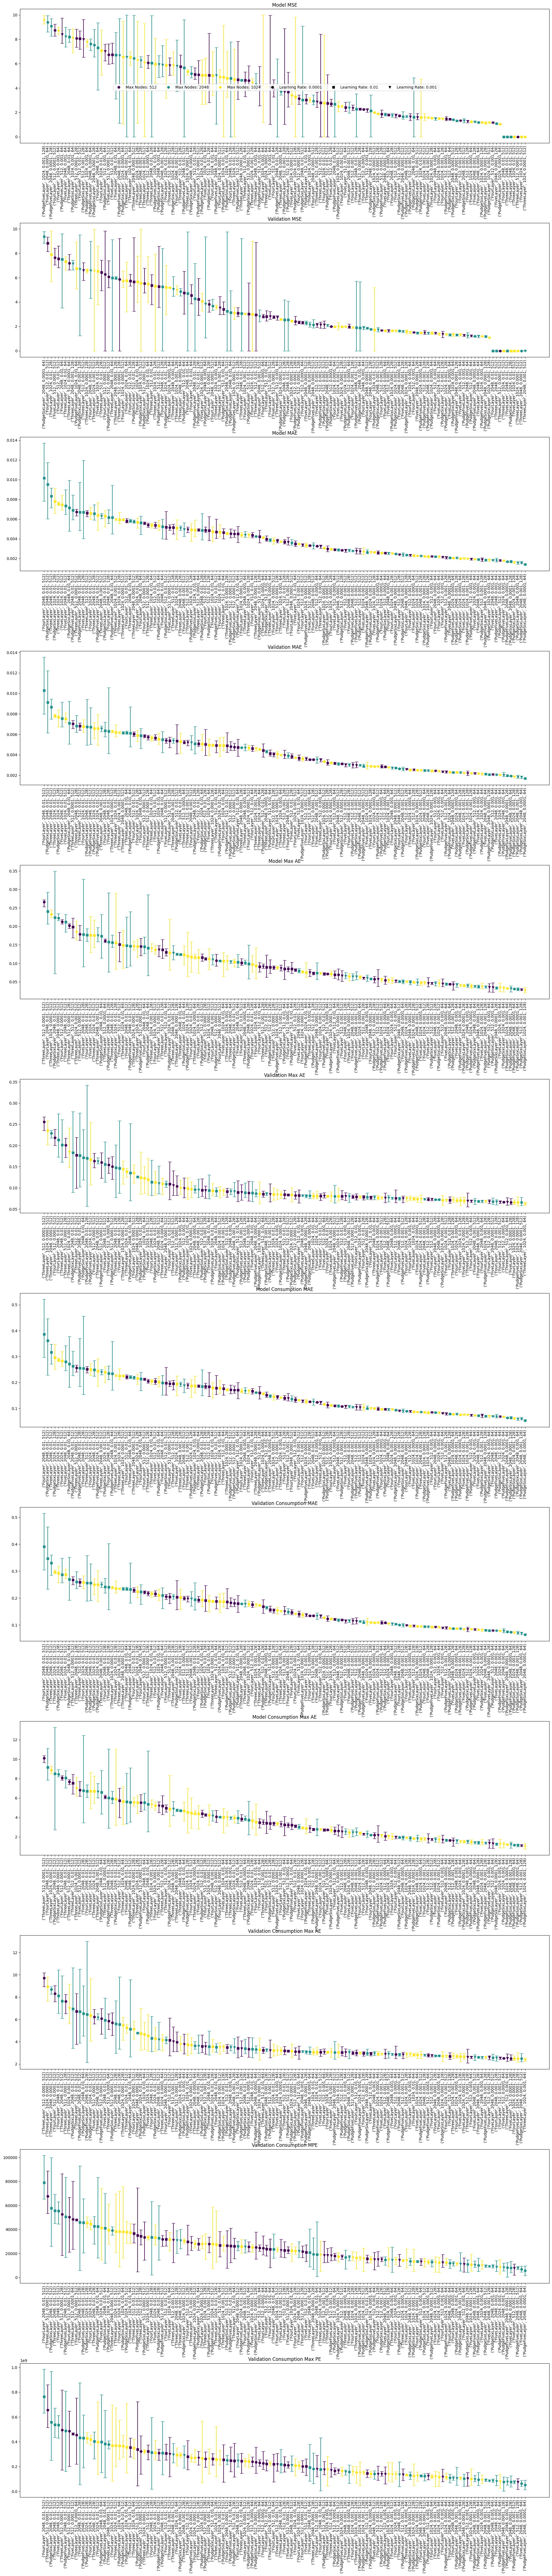

     Seed     Model Type  Max Nodes  Learning Rate  Batch Size  Model MSE  \
133    42  PudgeSixLayer       1024          0.001          64   8.873600   
266    21  PudgeSixLayer       1024          0.001          64   6.899755   
397    84  PudgeSixLayer       1024          0.001          64   8.502631   

     Validation MSE  Model MAE  Validation MAE  Model Max AE  \
133        1.440745   0.001931        0.002226      0.038634   
266        1.188306   0.001708        0.002013      0.022894   
397        1.326295   0.001891        0.002162      0.035547   

     Validation Max AE  Model Consumption MAE  Validation Consumption MAE  \
133           0.117871               0.073420                    0.084641   
266           0.084746               0.064928                    0.076533   
397           0.094022               0.071920                    0.082217   

     Model Consumption Max AE  Validation Consumption Max AE  \
133                  1.469025                       4.481923 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines


# Create a figure with 14 subplots arranged in a 14x1 grid
fig, axs = plt.subplots(len(metrics), 1, figsize=(20, 100))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define a color map for the max nodes
max_nodes = df['Max Nodes'].unique()
colors = plt.cm.get_cmap('viridis', len(max_nodes))
color_map = {node: colors(i) for i, node in enumerate(max_nodes)}

# Define a marker map for the learning rates
learning_rates = df['Learning Rate'].unique()
markers = ['o', 's', 'v', '^', '<', '>', '8', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
marker_map = {rate: markers[i % len(markers)] for i, rate in enumerate(learning_rates)}

# Create custom legend handles and labels
handles = [mlines.Line2D([], [], color=color_map[node], marker='o', linestyle='None') for node in max_nodes] + [mlines.Line2D([], [], color='black', marker=marker_map[rate], linestyle='None') for rate in learning_rates]
labels = [f'Max Nodes: {node}' for node in max_nodes] + [f'Learning Rate: {rate}' for rate in learning_rates]

# For each metric, create a scatter plot with error bars
for i, metric in enumerate(metrics):
    # Calculate the mean, min, and max for each group
    group_stats = df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[metric].agg(['mean', 'min', 'max'])
    
    # Sort the groups in descending order based on mean value
    group_stats = group_stats.sort_values(by='mean', ascending=False)
    
    # Create the scatter plot with colors corresponding to the max nodes and markers corresponding to the learning rate
    x = np.arange(len(group_stats))
    for j, (group, stats) in enumerate(group_stats.iterrows()):
        model_type, max_node, learning_rate, _ = group
        axs[i].errorbar(j, stats['mean'], yerr=[[stats['mean']-stats['min']], [stats['max']-stats['mean']]], fmt=marker_map[learning_rate], capsize=4, color=color_map[max_node])
    
    # Set the title of the subplot
    axs[i].set_title(metric)
    
    # Set the x-ticks to be the group names
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(group_stats.index, rotation=90)

# Add the legend to the figure
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Leave more space for the x-axis names
plt.subplots_adjust(bottom=0.1)

# Show the plot
plt.show()

print(df[(df['Model Type'] == 'PudgeSixLayer') & (df['Max Nodes'] == 1024) & (df['Learning Rate'] == 0.001) & (df['Batch Size'] == 64)])

In [31]:
df=pd.read_csv('nnperformance-no_adapt_all-Oct30.csv')
print(df[(df['Model Type'] == 'PudgeSixLayer') & (df['Max Nodes'] == 2048) & (df['Learning Rate'] == 0.0001) & (df['Batch Size'] == 64)])


     Seed     Model Type  Max Nodes  Learning Rate  Batch Size  Model MAE  \
18     42  PudgeSixLayer       2048         0.0001          64   0.001364   
156    21  PudgeSixLayer       2048         0.0001          64   0.001359   
292    84  PudgeSixLayer       2048         0.0001          64   0.001501   

     Validation MAE  Model Max AE  Validation Max AE  Model Consumption MAE  \
18         0.001649      0.031315           0.075057               0.051873   
156        0.001648      0.026068           0.093211               0.051684   
292        0.001767      0.033938           0.075963               0.057069   

     Validation Consumption MAE  Model Consumption Max AE  \
18                     0.062683                  1.190709   
156                    0.062668                  0.991218   
292                    0.067183                  1.290451   

     Validation Consumption Max AE  Validation Consumption MPE  \
18                        2.853976                 4996.458008 